In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch.univariate import ARCH, GARCH, ARX
from arch import arch_model

In [23]:
data = pd.read_excel("./data/REAL.xls",index_col="DATE")
y = pd.DataFrame(np.log(data["RGDP"]).diff()[1:])

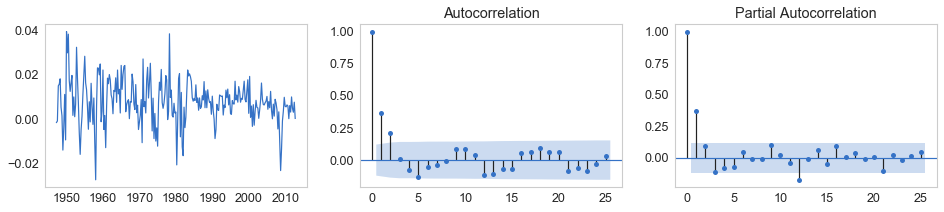

In [35]:
fig,axes = plt.subplots(1,3,figsize = (16,3))
axes[0].plot(y)
sm.graphics.tsa.plot_acf(y,ax = axes[1])
sm.graphics.tsa.plot_pacf(y, ax = axes[2])
plt.show()

In [36]:
m1 = sm.tsa.ARMA(y, order=(1,0)).fit(trend="c")
res_2 = m1.resid[6:]**2
print(m1.summary())

                              ARMA Model Results                              
Dep. Variable:                   RGDP   No. Observations:                  263
Model:                     ARMA(1, 0)   Log Likelihood                 861.637
Method:                       css-mle   S.D. of innovations              0.009
Date:                Fri, 16 Aug 2019   AIC                          -1717.274
Time:                        18:08:29   BIC                          -1706.558
Sample:                    04-01-1947   HQIC                         -1712.967
                         - 10-01-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.001      8.656      0.000       0.006       0.009
ar.L1.RGDP     0.3704      0.057      6.467      0.000       0.258       0.483
                                    Roots           

D:\anaconda\envs\dataServer\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [37]:
m2 = sm.tsa.ARMA(res_2,order=(4,0)).fit(trend="c")
m2.summary()

D:\anaconda\envs\dataServer\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  257
Model:                     ARMA(4, 0)   Log Likelihood                1880.609
Method:                       css-mle   S.D. of innovations              0.000
Date:                Fri, 16 Aug 2019   AIC                          -3749.218
Time:                        18:08:32   BIC                          -3727.924
Sample:                    10-01-1948   HQIC                         -3740.654
                         - 10-01-2012                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.409e-05   1.51e-05      5.587      0.000    5.46e-05       0.000
ar.L1.y        0.1153      0.062      1.867      0.063      -0.006       0.236
ar.L2.y        0.1294      0.062      2.071      0.039       0.007       0.252
ar.L3.y       -0.0309      0.062     -0.495      0.621      -0.153       0.092
ar.L4.y        0.1237      0.062      1.997      0.047       0.002       0.245
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5663           -0.0000j            1.5663           -0.5000
AR.2            1.5071           -0.0000j            1.5071           -0.0000
AR.3            0.1545           -1.8441j            1.8506           -0.2367
AR.4            0.1545           +1.8441j            1.8506            0.2367
-----------------------------------------------------------------------------
"""

In [7]:
m3 = ARX(y,lags = [1])
m3.volatility=GARCH(p=1,q=0)
m3.fit(disp=False).summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -852.4616671354638
Iteration:      2,   Func. Count:     19,   Neg. LLF: -852.4690805094154


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                   RGDP   R-squared:                       0.137
Mean Model:                        AR   Adj. R-squared:                  0.134
Vol Model:                       ARCH   Log-Likelihood:                852.469
Distribution:                  Normal   AIC:                          -1696.94
Method:            Maximum Likelihood   BIC:                          -1682.66
                                        No. Observations:                  262
Date:                Fri, Aug 16 2019   Df Residuals:                      258
Time:                        18:03:38   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      4.8611e-03  9.837e-04      4.942  7.747e-07 [2.933e-03,6.789e-03]
RGDP[1]        0.3706  8.172e-02      4.535  5.773e-06     [  0.210,  0.531]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.1761e-05  3.475e-06     12.017  2.882e-33 [3.495e-05,4.857e-05]
alpha[1]       0.2000  7.289e-02      2.744  6.074e-03   [5.713e-02,  0.343]
============================================================================

Covariance estimator: robust
"""

In [8]:
m4 = arch_model(y = y["RGDP"],mean ="ARX",vol ="ARCH",lags = 1).fit(disp="off")
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                   RGDP   R-squared:                       0.137
Mean Model:                        AR   Adj. R-squared:                  0.134
Vol Model:                       ARCH   Log-Likelihood:                864.193
Distribution:                  Normal   AIC:                          -1720.39
Method:            Maximum Likelihood   BIC:                          -1706.11
                                        No. Observations:                  262
Date:                Fri, Aug 16 2019   Df Residuals:                      258
Time:                        18:03:38   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      4.7005e-03  8.642e-04      5.439  5.349e-08 [3.007e-03,6.394e-03]
RGDP[1]        0.3937  7.128e-02      5.523  3.338e-08     [  0.254,  0.533]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.3836e-05  8.920e-06      7.157  8.256e-13 [4.635e-05,8.132e-05]
alpha[1]       0.2544      0.139      1.834  6.660e-02  [-1.741e-02,  0.526]
============================================================================

Covariance estimator: robust
"""

In [9]:
m5 = ARX(y["RGDP"],lags=1).fit(disp="off")

In [ ]:
m5.summary()

#### NYSE

In [59]:
date = pd.date_range(start="2000-1-4",end="2012-7-16",freq="B")
data = pd.read_excel("./data/NYSE.xlsx")
rate = data.loc[1:,"RATE"]
rate.index = date

D:\anaconda\envs\dataServer\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


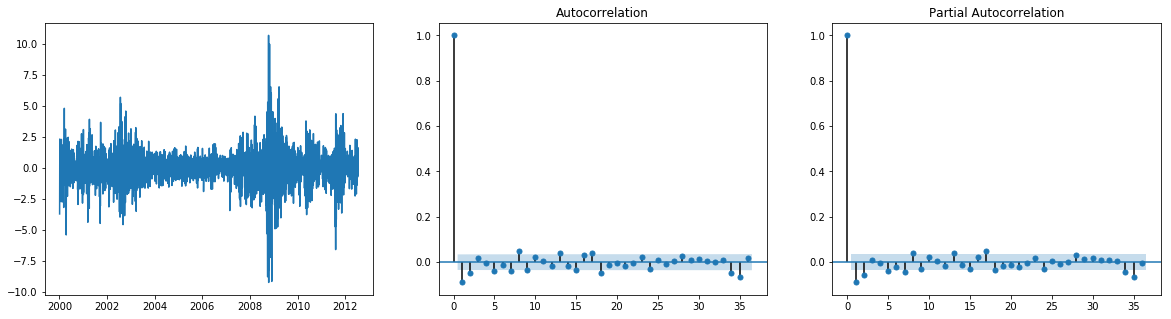

In [61]:
fig,axes = plt.subplots(1,3,figsize = (20,5))
axes[0].plot(rate)
sm.graphics.tsa.plot_acf(rate,ax = axes[1])
sm.graphics.tsa.plot_pacf(rate, ax = axes[2])
plt.show()

(-5, 5)

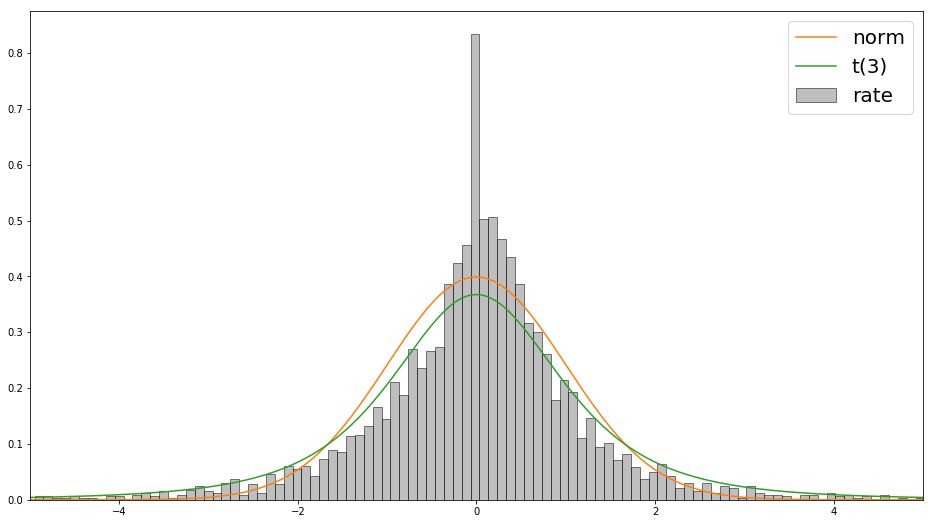

In [36]:
from scipy.stats import t,norm
x = np.arange(-10,10,0.01)
fig,axes = plt.subplots(figsize = (16,9))
axes.hist(rate,bins=200,facecolor = "gray",edgecolor= "black",density=1,label = "rate",alpha=0.5)
axes.plot(x,norm.pdf(x,0,1),label="norm")
axes.plot(x,t.pdf(x,3),label = "t(3)")
plt.legend(fontsize=20)
# axes.set_ylim(0,0.6)
axes.set_xlim(-5,5)

In [6]:
m1 = sm.tsa.ARMA(rate,order=(2,0)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   RATE   No. Observations:                 3270
Model:                     ARMA(2, 0)   Log Likelihood               -5427.186
Method:                       css-mle   S.D. of innovations              1.272
Date:                Mon, 19 Aug 2019   AIC                          10862.373
Time:                        10:10:18   BIC                          10886.743
Sample:                             0   HQIC                         10871.100
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.019      0.163      0.870      -0.035       0.041
ar.L1.RATE    -0.0947      0.017     -5.421      0.000      -0.129      -0.060
ar.L2.RATE    -0.0576      0.017     -3.294      0.001      -0.092      -0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8227           -4.0853j            4.1673           -0.2816
AR.2           -0.8227           +4.0853j            4.1673            0.2816
-----------------------------------------------------------------------------
"""

In [7]:
res_2 = m1.resid **2
test = sm.tsa.ARMA(res_2,order=(5,0)).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 3270
Model:                     ARMA(5, 0)   Log Likelihood               -9507.833
Method:                       css-mle   S.D. of innovations              4.431
Date:                Mon, 19 Aug 2019   AIC                          19029.667
Time:                        10:10:42   BIC                          19072.315
Sample:                             0   HQIC                         19044.940
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6254      0.255      6.365      0.000       1.125       2.126
ar.L1.y        0.0469      0.017      2.756      0.006       0.014       0.080
ar.L2.y        0.3085      0.017     18.212      0.000       0.275       0.342
ar.L3.y        0.0046      0.018      0.259      0.796      -0.030       0.039
ar.L4.y        0.1040      0.017      6.141      0.000       0.071       0.137
ar.L5.y        0.2332      0.017     13.709      0.000       0.200       0.267
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1134           -0.0000j            1.1134           -0.0000
AR.2            0.4436           -1.3533j            1.4242           -0.1996
AR.3            0.4436           +1.3533j            1.4242            0.1996
AR.4           -1.2233           -0.6341j            1.3779           -0.4239
AR.5           -1.2233           +0.6341j            1.3779            0.4239
-----------------------------------------------------------------------------
"""

In [62]:
garch = arch_model(y = rate,mean ="ARX",vol ="GARCH",lags = 2,dist='normal').fit(disp="off")
garch_t = arch_model(y = rate,mean ="ARX",vol ="GARCH",lags = 2,dist='t').fit(disp="off")

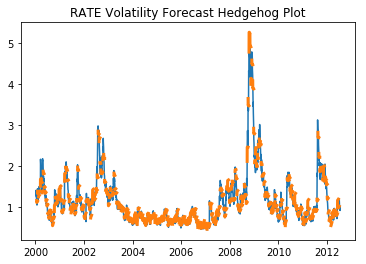

<Figure size 1152x648 with 0 Axes>

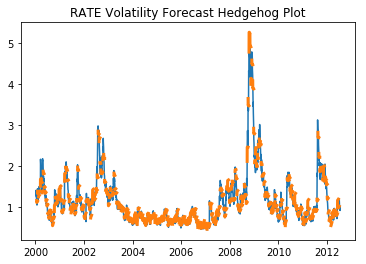

In [63]:
plt.figure(figsize=(16,9))
garch_t.hedgehog_plot()

In [37]:
from arch.univariate import EWMAVariance,StudentsT,FIGARCH
igarch_t = ARX(y=rate,lags = 2,distribution=StudentsT())
igarch_t.volatility=EWMAVariance(None)
igarch_t.fit(disp=False).summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4601.956744594031
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4590.483668248513
Iteration:      3,   Func. Count:     31,   Neg. LLF: 4590.279051631308
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4589.645742021402
Iteration:      5,   Func. Count:     50,   Neg. LLF: 4589.306620630245
Iteration:      6,   Func. Count:     59,   Neg. LLF: 4588.666263532098
Iteration:      7,   Func. Count:     66,   Neg. LLF: 4588.582725575334
Iteration:      8,   Func. Count:     73,   Neg. LLF: 4588.580686372719
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4588.580614461446


<class 'statsmodels.iolib.summary.Summary'>
"""
                        AR - EWMA/RiskMetrics Model Results                         
====================================================================================
Dep. Variable:                         RATE   R-squared:                       0.008
Mean Model:                              AR   Adj. R-squared:                  0.008
Vol Model:                 EWMA/RiskMetrics   Log-Likelihood:               -4588.58
Distribution:      Standardized Student's t   AIC:                           9187.16
Method:                  Maximum Likelihood   BIC:                           9217.62
                                              No. Observations:                 3268
Date:                      Mon, Aug 19 2019   Df Residuals:                     3263
Time:                              14:58:42   Df Model:                            5
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0609  1.576e-02      3.868  1.098e-04   [3.006e-02,9.183e-02]
RATE[1]       -0.0624  1.676e-02     -3.723  1.971e-04 [-9.525e-02,-2.955e-02]
RATE[2]       -0.0449  1.921e-02     -2.336  1.951e-02 [-8.252e-02,-7.217e-03]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
lam            0.9295  7.751e-03    119.913      0.000 [  0.914,  0.945]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.9058      0.695      9.933  2.985e-23 [  5.543,  8.268]
========================================================================

Covariance estimator: robust
"""

In [69]:
# test for remaining serial correlation
s_t = garch_t.resid[2:] / garch_t.conditional_volatility[2:]
q_stat = pd.DataFrame(sm.tsa.acf(s_t,nlags=16,qstat=True, fft=False),index=["acf",'Q','p-value'])
q_stat[[1,4,8,12,15]]

,1,4,8,12,15
acf,0.002182,0.008594,0.005741,0.013736,-0.007827
Q,0.370966,3.682620,7.790410,14.571033,15.119270
p-value,0.830703,0.595952,0.555398,0.334892,0.515921


In [51]:
# test for remaining GARCH effects
s_t_2 = s_t ** 2
q_stat = pd.DataFrame(sm.tsa.acf(s_t_2,nlags=15,qstat=True, fft=False),index=["acf",'Q','p-value'])
print(q_stat.T)
test_2 = sm.tsa.ARMA(s_t_2,order=(1,0)).fit(disp=False)
print(test_2.summary())

         acf          Q   p-value
0   1.000000   7.166941  0.007426
1  -0.046809  11.165137  0.003763
2   0.034956  11.621384  0.008799
3  -0.011807  12.538252  0.013767
4   0.016735  12.702082  0.026336
5  -0.007073  13.292727  0.038616
6  -0.013427  15.939398  0.025676
7   0.028419  16.173854  0.039958
8  -0.008457  17.055608  0.047852
9   0.016398  23.567554  0.008835
10  0.044557  24.111953  0.012269
11 -0.012881  25.527890  0.012510
12  0.020771  25.783918  0.018173
13  0.008831  25.784444  0.027568
14 -0.000400  26.070650  0.037287
15 -0.009334        NaN       NaN
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3268
Model:                     ARMA(1, 0)   Log Likelihood               -6818.143
Method:                       css-mle   S.D. of innovations              1.949
Date:                Mon, 19 Aug 2019   AIC                          13642.286
Time:                      

In [37]:
X = np.column_stack((s_t[1:-1], s_t[:-2]))
X = sm.add_constant(X)
Y = s_t_2[2:]
Lev = sm.OLS(Y, X).fit()
print(Lev.summary())
R = np.identity(3)[1:,:]
print(Lev.f_test(R))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     17.58
Date:                Mon, 19 Aug 2019   Prob (F-statistic):           2.56e-08
Time:                        10:51:19   Log-Likelihood:                -6800.2
No. Observations:                3266   AIC:                         1.361e+04
Df Residuals:                    3263   BIC:                         1.362e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9694      0.034     28.419      0.0

In [42]:
d = []
for e in s_t:
    if e>0:
        d.append(0)
    else:
        d.append(1)
d_t = np.array(d)
X = np.column_stack((d_t[2:-1], d_t[1:-2],d_t[:-3]))
X = sm.add_constant(X)
Y = s_t_2[3:]
Lev = sm.OLS(Y, X).fit()
print(Lev.summary())
R = np.identity(4)[1:,:]
print(Lev.f_test(R))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     13.11
Date:                Mon, 19 Aug 2019   Prob (F-statistic):           1.66e-08
Time:                        10:54:41   Log-Likelihood:                -6796.5
No. Observations:                3265   AIC:                         1.360e+04
Df Residuals:                    3261   BIC:                         1.363e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6204      0.070      8.902      0.0

In [65]:
X = np.column_stack((d_t[:-1],d_t[:-1]*s_t[:-1] ,(1-d_t[:-1])*s_t[:-1] ))
X = sm.add_constant(X)
Y = s_t_2[1:]
Lev = sm.OLS(Y, X).fit()
print(Lev.summary())
R = np.identity(4)[1:,:]
print(Lev.f_test(R))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     11.12
Date:                Mon, 19 Aug 2019   Prob (F-statistic):           2.92e-07
Time:                        12:04:29   Log-Likelihood:                -6803.5
No. Observations:                3267   AIC:                         1.361e+04
Df Residuals:                    3263   BIC:                         1.364e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0071      0.077     13.075      0.0

In [72]:
# Asymmetric model
tgarch_t = arch_model(y = rate,mean ="ARX",vol ="GARCH",lags = 2,dist='t',p=1,q=1,o=1).fit(disp="off")
egarch_t = arch_model(y = rate,mean ="ARX",vol ="EGARCH",lags = 2,dist='t',p=1,q=1,o=1).fit(disp="off")

In [4]:
print(tgarch_t.summary())
print(egarch_t.summary())

                            AR - GJR-GARCH Model Results                            
Dep. Variable:                         RATE   R-squared:                       0.009
Mean Model:                              AR   Adj. R-squared:                  0.009
Vol Model:                        GJR-GARCH   Log-Likelihood:               -4521.18
Distribution:      Standardized Student's t   AIC:                           9058.37
Method:                  Maximum Likelihood   BIC:                           9107.10
                                              No. Observations:                 3268
Date:                      Mon, Aug 19 2019   Df Residuals:                     3260
Time:                              14:29:54   Df Model:                            8
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

In [73]:
s_t = egarch_t.resid[2:] / egarch_t.conditional_volatility[2:]
s_t_2 = s_t **2
test = sm.tsa.ARMA(s_t_2,order=(1,0)).fit(disp=False)
print(test.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3268
Model:                     ARMA(1, 0)   Log Likelihood               -6730.335
Method:                       css-mle   S.D. of innovations              1.897
Date:                Mon, 19 Aug 2019   AIC                          13466.670
Time:                        15:13:22   BIC                          13484.946
Sample:                    01-06-2000   HQIC                         13473.216
                         - 07-16-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9943      0.032     31.562      0.000       0.933       1.056
ar.L1.y       -0.0537      0.017     -3.074      0.002      -0.088      -0.019
                                    Roots           

In [103]:
forecasts = egarch_t.forecast(horizon=1, start="2007-1-1", method='simulation')

Text(0.5, 1.0, 'Predicted Volatility')

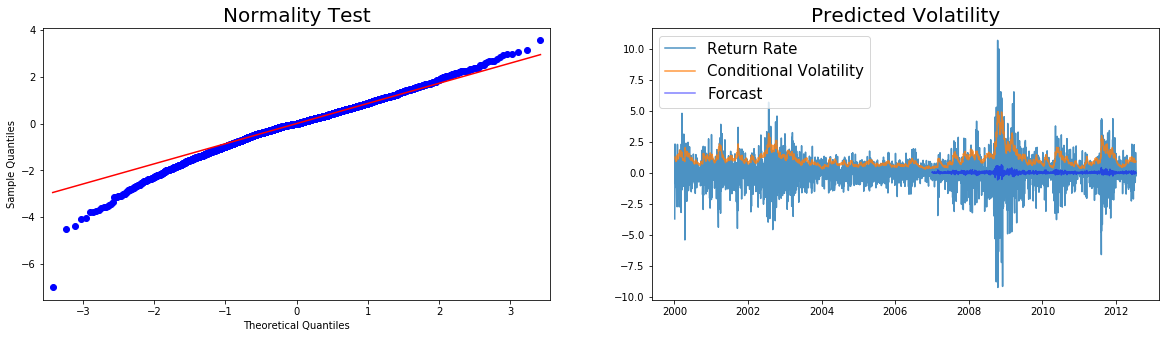

In [123]:
fig,axes = plt.subplots(1,2,figsize = (20,5))
sm.graphics.qqplot(s_t,line ='q',ax = axes[0])
axes[1].plot(rate,label = "Return Rate",alpha= 0.8)
axes[1].plot(egarch_t.conditional_volatility,label = "Conditional Volatility",alpha = 0.8)
axes[1].plot(forecasts.mean,label = "Forcast",c = "b",alpha =0.5)
axes[1].legend(fontsize = 15)
axes[0].set_title("Normality Test", fontsize = 20)
axes[1].set_title("Predicted Volatility", fontsize =  20)